In [213]:
import math
import numpy as np

N0 = (2**(7/2))/(3*np.sqrt(math.pi))
c = 3e5 # speed of light in km/s^2
Mpc2cm = 3.086e24 # 1 Mpc = 3.086e24 cm
omega_b = 0.044 # baryon density
rho_crit = 4.755e-6 # critical density in (GeV/c^2)*cm^-3
YHe = 0.24 # helium mass fraction
Yp = 1.0-YHe # proton mass fraction
k = 8.617e-14 # Boltzmann constant in GeV/K
T0 = 2.73 # temperature of CMB today in K
kT0 = k*T0

B = c*Mpc2cm*N0**omega_b*rho_crit*Yp*(kT0**0.5)

omega_rad = 1.0e-4 # radiation density
H0 = 67.27 # Hubble constant in km/s/Mpc
mp = 1.0 # proton mass in GeV/c^2

mx = 1.0 # dark matter mass in GeV/c^2
sigma0 = 1.8e-25 # cross section in cm^2

In [214]:
zth = np.power((H0*np.sqrt(omega_rad)*np.sqrt(mx+mp)*np.sqrt(mx*mp)*((mx+mp)/mx))/(B*sigma0), 2./3.)
print(zth)

34115.37735518149


In [215]:
from scipy.optimize import fsolve

def func(x):
    return [(((mx/(mx+mp))*(B*sigma0*(1/(mx+mp))*(((x[0])*((1/mp)+(1/mx)))**(0.5)))) - (H0*math.sqrt(omega_rad)*(x[0]**2))),
            ((B*sigma0*(1/(mx+mp))*((((x[1])/mp)+(((x[1])**2)/(mx*x[0])))**(0.5))) - (H0*math.sqrt(omega_rad)*(x[1]**2)))]

root = fsolve(func, [1, 1])
zth = 1/root[0]
zcrit = 1/root[1]
print("zth:", zth)
print("zcrit:", zcrit)

zth: 34115.37735518117
zcrit: 19281.93340883021


In [216]:
kcrit = (2*H0*(math.sqrt(omega_rad))*zcrit)/c # 1/Mpc
print("kcrit:", kcrit)

k = 0.0857 # 1/Mpc
bool(kcrit > k)

kcrit: 0.08647304402746721


True

In [125]:
import math
import numpy as np
from scipy.optimize import fsolve

N0 = (2**(7/2))/(3*np.sqrt(math.pi))
c = 3e5 # speed of light in km/s^2
Mpc2cm = 3.086e24 # 1 Mpc = 3.086e24 cm
omega_b = 0.044 # baryon density
rho_crit = 4.755e-6 # critical density in (GeV/c^2)*cm^-3
YHe = 0.24 # helium mass fraction
Yp = 1.0-YHe # proton mass fraction
k = 8.617e-14 # Boltzmann constant in GeV/K
T0 = 2.73 # temperature of CMB today in K
kT0 = k*T0

B = c*Mpc2cm*N0**omega_b*rho_crit*Yp*(kT0**0.5)

omega_rad = 1.0e-4 # radiation density
H0 = 67.27 # Hubble constant in km/s/Mpc
mp = 0.938 # proton mass in GeV/c^2

#mx = 1.0 # dark matter mass in GeV/c^2
#sigma0 = 1.8e-25 # cross section in cm^2

In [126]:
kcrit = 0.0857 # 1/Mpc

zcrit = (kcrit*c)/(2*H0*(math.sqrt(omega_rad)))
print("zcrit:", zcrit)

zcrit: 19109.55849561469


In [127]:
masses_test = np.array([1.0e-6, 1.0e-3, 1.0, 1.0e3])
sigmas = np.zeros(len(masses))

for i in range(len(masses_test)):
    mx=masses_test[i]
    print("mx:", format(mx, 'e'))
    
    def func(x):
        return [(((mx/(mx+mp))*(B*x[1]*(1/(mx+mp))*(((x[0])*((1/mp)+(1/mx)))**(0.5)))) - (H0*math.sqrt(omega_rad)*(x[0]**2))),
                ((B*x[1]*(1/(mx+mp))*((((1/zcrit)/mp)+(((1/zcrit)**2)/(mx*x[0])))**(0.5))) - (H0*math.sqrt(omega_rad)*((1/zcrit)**2)))]

    root = fsolve(func, [1.0e4, 1.0e-30])
    zth = 1/root[0]
    sigma0 = root[1]
    sigmas[i] = root[1]
    print("zth:", zth)
    print("sigma0:", sigma0)
    print()

mx: 1.000000e-06
zth: 10759975.587619433
sigma0: 6.000669757231036e-30

mx: 1.000000e-03
zth: 4351752.143177201
sigma0: 2.986990396592896e-28

mx: 1.000000e+00
zth: 32803.95542918368
sigma0: 1.7635815198243555e-25

mx: 1.000000e+03
zth: 19121.510207836476
sigma0: 1.4708950328752378e-22



/home/davidvng/anaconda3/envs/dmeff/lib/python3.8/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


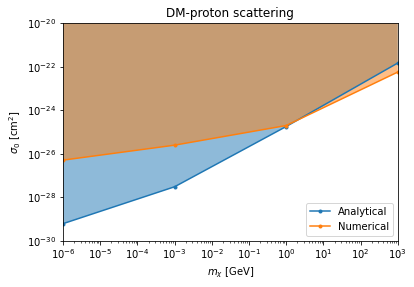

In [128]:
import matplotlib.pyplot as plt

proton_chains = np.array([5.02e-27, 2.45e-26, 1.96e-25, 5.64e-23])

f,ax = plt.subplots()

ax.plot(masses, sigmas, marker='.', label='Analytical')
ax.plot(masses, proton_chains, marker='.', label='Numerical')
ax.set_title('DM-proton scattering')
ax.set_xlabel('$m_\chi$ $[\mathrm{GeV}]$')
ax.set_ylabel('$\sigma_0$ $[\mathrm{cm}^2]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-6, 1.0e3])
ax.set_ylim([1.0e-30, 1.0e-20])
ax.fill_between(masses, sigmas, 1.0e-20, alpha=0.5)
ax.fill_between(masses, proton_chains, 1.0e-20, alpha=0.5)
plt.legend(loc="lower right")

In [129]:
import math
import numpy as np

N0 = (2**(7/2))/(3*np.sqrt(math.pi))
c = 3e5 # speed of light in km/s^2
Mpc2cm = 3.086e24 # 1 Mpc = 3.086e24 cm
omega_b = 0.044 # baryon density
rho_crit = 4.755e-6 # critical density in (GeV/c^2)*cm^-3
YHe = 0.24 # helium mass fraction
Yp = (1.0-YHe)/1836.152 # proton mass fraction
k = 8.617e-14 # Boltzmann constant in GeV/K
T0 = 2.73 # temperature of CMB today in K
kT0 = k*T0

B = c*Mpc2cm*N0**omega_b*rho_crit*Yp*(kT0**0.5)

omega_rad = 1.0e-4 # radiation density
H0 = 67.27 # Hubble constant in km/s/Mpc
mp = 0.511e-3 # proton mass in GeV/c^2

mx = 1.0 # dark matter mass in GeV/c^2
sigma0 = 6.0e-24 # cross section in cm^2

from scipy.optimize import fsolve

def func(x):
    return [(((mx/(mx+mp))*(B*sigma0*(1/(mx+mp))*(((x[0])*((1/mp)+(1/mx)))**(0.5)))) - (H0*math.sqrt(omega_rad)*(x[0]**2))),
            ((B*sigma0*(1/(mx+mp))*((((x[1])/mp)+(((x[1])**2)/(mx*x[0])))**(0.5))) - (H0*math.sqrt(omega_rad)*(x[1]**2)))]

root = fsolve(func, [1, 1])
zth = 1/root[0]
zcrit = 1/root[1]
print("zth:", zth)
print("zcrit:", zcrit)

kcrit = (2*H0*(math.sqrt(omega_rad))*zcrit)/c # 1/Mpc
print("kcrit:", kcrit)

k = 0.0857 # 1/Mpc
bool(kcrit > k)

zth: 19753.115726634154
zcrit: 19746.388217438198
kcrit: 0.08855596902580451


True

zcrit: 19109.55849561469
mx: 1.000000e-06
zth: 3962243.5121884956
sigma0: 9.910770811016449e-30

mx: 1.000000e-03
zth: 26170.07203450285
sigma0: 7.302325376187697e-27

mx: 1.000000e+00
zth: 19116.06903967446
sigma0: 6.302411806463656e-24

mx: 1.000000e+03
zth: 19109.565005604833
sigma0: 6.3008043151637735e-21



/home/davidvng/anaconda3/envs/dmeff/lib/python3.8/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


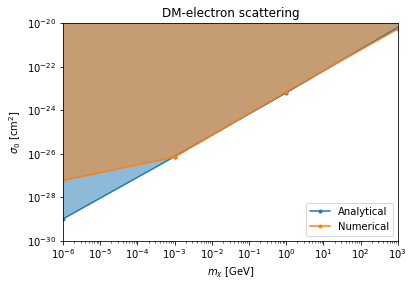

In [130]:
import math
import numpy as np
from scipy.optimize import fsolve

N0 = (2**(7/2))/(3*np.sqrt(math.pi))
c = 3e5 # speed of light in km/s^2
Mpc2cm = 3.086e24 # 1 Mpc = 3.086e24 cm
omega_b = 0.044 # baryon density
rho_crit = 4.755e-6 # critical density in (GeV/c^2)*cm^-3
YHe = 0.24 # helium mass fraction
Yp = (1.0-YHe)/1836.152 # proton mass fraction
k = 8.617e-14 # Boltzmann constant in GeV/K
T0 = 2.73 # temperature of CMB today in K
kT0 = k*T0

B = c*Mpc2cm*N0**omega_b*rho_crit*Yp*(kT0**0.5)

omega_rad = 1.0e-4 # radiation density
H0 = 67.27 # Hubble constant in km/s/Mpc
mp = 0.511e-3 # ELECTRON mass in GeV/c^2

#mx = 1.0 # dark matter mass in GeV/c^2
#sigma0 = 1.8e-25 # cross section in cm^2

kcrit = 0.0857 # 1/Mpc

zcrit = (kcrit*c)/(2*H0*(math.sqrt(omega_rad)))
print("zcrit:", zcrit)

masses_test = np.array([1.0e-6, 1.0e-3, 1.0, 1.0e3])
sigmas = np.zeros(len(masses))

for i in range(len(masses_test)):
    mx=masses_test[i]
    print("mx:", format(mx, 'e'))
    
    def func(x):
        return [(((mx/(mx+mp))*(B*x[1]*(1/(mx+mp))*(((x[0])*((1/mp)+(1/mx)))**(0.5)))) - (H0*math.sqrt(omega_rad)*(x[0]**2))),
                ((B*x[1]*(1/(mx+mp))*((((1/zcrit)/mp)+(((1/zcrit)**2)/(mx*x[0])))**(0.5))) - (H0*math.sqrt(omega_rad)*((1/zcrit)**2)))]

    root = fsolve(func, [1.0e4, 1.0e-25])
    zth = 1/root[0]
    sigma0 = root[1]
    sigmas[i] = root[1]
    print("zth:", zth)
    print("sigma0:", sigma0)
    print()
    
import matplotlib.pyplot as plt

electron_chains = np.array([5.85e-28, 6.92e-27, 7.06e-24, 5.40e-21])

f,ax = plt.subplots()

ax.plot(masses, sigmas, marker='.', label='Analytical')
ax.plot(masses, electron_chains, marker='.', label='Numerical')
ax.set_title('DM-electron scattering')
ax.set_xlabel('$m_\chi$ $[\mathrm{GeV}]$')
ax.set_ylabel('$\sigma_0$ $[\mathrm{cm}^2]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1.0e-6, 1.0e3])
ax.set_ylim([1.0e-30, 1.0e-20])
ax.fill_between(masses, sigmas, 1.0e-20, alpha=0.5)
ax.fill_between(masses, electron_chains, 1.0e-20, alpha=0.5)
plt.legend(loc="lower right")